## Librerías

In [1]:
import re
import random
import string
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Ejercicio 1, 2, 3, 4

En este ejercicio, analizaremos datos de Twitter extraídos del archivo "tweets.txt". Primero definimos la función `preprocess_text` para el preprocesamiento del texto. Esta función se encarga de varias tareas, como convertir el texto a minúsculas, eliminar puntuación, palabras vacías (stopwords), URLs, menciones, hashtags...

A continuación, definimos la función `create_corpus`, donde leemos el archivo de texto, creamos un corpus a partir de los datos sin procesar y realizamos el preprocesamiento en dicho corpus. Finalmente, representamos los documentos en forma de matriz convirtiendo el corpus procesado en una matriz de frecuencia inversa de términos (TF-IDF). La matriz resultante representa la frecuencia de las palabras en cada tweet, ponderada por la importancia relativa de esas palabras en todo el corpus. Cada fila representa un documento, cada columna representa una palabra única y los valores en la matriz son los puntajes TF-IDF.

In [ ]:
def preprocess_text(text):
    # Eliminar prefijos 'b' si existen y no están seguidos de ninguna letra
    text = re.sub(r'\b(b)\b', '', text)

    # Eliminar palabras que contengan una barra invertida o una barra diagonal
    text = re.sub(r'\b\S*[\\/]\S*\b', '', text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar espacios en blanco al inicio y al final
    text = text.strip()

    # Eliminar URLs
    text = re.sub(r'https?://\S+', '', text)

    # Eliminar menciones de Twitter (que comienzan con @)
    text = re.sub(r'@\w+', '', text)

    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-ZáéíóúüñçÁÉÍÓÚÜÑÇ\s]', '', text)

    # Reemplazar valores NaN con una cadena vacía
    if pd.isnull(text):
        text = ""

    # Eliminar palabras vacías (stopwords)
    stop_words = set(stopwords.words('english'))  # Usar la lista de stopwords en inglés
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Eliminar palabras con menos de 4 letras
    text = ' '.join(word for word in text.split() if len(word) >= 4)

    # Eliminar espacios en blanco adicionales
    text = ' '.join(text.split())  # Esto colapsará espacios consecutivos en uno solo

    return text


In [ ]:
# Creación del corpus
def create_corpus(file_path):
    corpus = []
    # Abrir el archivo y leer su contenido
    with open(file_path, 'r', encoding='utf-8') as chat_file:
        # Dividir las conversaciones usando una línea en blanco como separador
        #conversations = chat_file.read().split('\n\n')
        conversations = chat_file.read().split('\n')
        for conversation in conversations:
            # Preprocesar cada conversación
            preprocessed_conversation = preprocess_text(conversation)
            corpus.append(preprocessed_conversation)
    return corpus

# Crear el corpus a partir del archivo 'tweets.txt'
corpus = create_corpus('tweets.txt')

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
doc_matrix = tfidf_vectorizer.fit_transform(corpus)
print("Matrix Shape:", doc_matrix.shape)

Matrix Shape: (2820, 5287)


In [ ]:
corpus

['robots spared humanity',
 'exactly tesla absurdly overvalued based past thats',
 'walt',
 'stormy weather shortville',
 'coal dying fracking basically dead',
 'helicopter helicopters clothing',
 'wont matter',
 'pretty good',
 'waste much time developing silly rockets damn aliens obtuse crazy tech cant speak english',
 'technology breakthrough turns chemtrails actually message timetraveling aliens describing secret teleportation',
 'weve created worlds first spamdetecting trained entirely simulation deployed physical robot',
 'extremely important reusable rockets bring much closer becoming',
 'ludicrous although rocket starts going faster',
 'bring back like dragon question much weight need',
 'working',
 'looks like could structural upgrades handle higher loads thats fully expendable mode',
 '',
 'silliest thing imagine secret payload dragon flight giant wheel cheese inspired',
 'good point odds',
 'falcon heavy test flight currently scheduled late summer',
 'considering trying brin

In [ ]:
doc_matrix

<2820x5287 sparse matrix of type '<class 'numpy.float64'>'
	with 19415 stored elements in Compressed Sparse Row format>

### Ejercicio 5

Para identificar términos distintivos que tengan un peso significativo en el conjunto de documentos, calcularemos las puntuaciones de las palabras basándonos en el enfoque TF-IDF. A continuación, se imprimirán en pantalla las 10 palabras más relevantes junto con sus respectivas puntuaciones, ofreciendo una perspectiva destacada sobre los términos clave en el análisis de texto.

In [ ]:
# valor global para cada palabra que refleja cuántas veces apareció en total en todos los documentos
word_scores = np.array(doc_matrix.sum(axis=0)).reshape(-1)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
# empareja las palabras con sus respectivas puntuaciones
word_scores_dict = dict(zip(feature_names, word_scores))
# ordena los pares de tuplas de mayor a menor (reverse=True) basándose en el valor de la puntuación
sorted_word_scores = sorted(word_scores_dict.items(), key=lambda x: x[1], reverse=True)

# Imprimir las 10 palabras más relevantes
top_n = 10
print(f"Top {top_n} Most Relevant Words:")
for word, score in sorted_word_scores[:top_n]:
    print(f"{word}: {score}")


Top 10 Most Relevant Words:
tesla: 58.45017474929721
model: 54.87861116569926
good: 37.07165561430878
launch: 35.90336434972208
thanks: 32.9136152856037
rocket: 29.2438416312793
falcon: 28.348092036621345
like: 27.607803275004027
dragon: 27.1640053036222
next: 22.411204087098014


## Ejercicio 6

Ahora, utilizando una nube de palabras, representaremos visualmente las frecuencias de las palabras extraídas de la matriz de términos del documento.

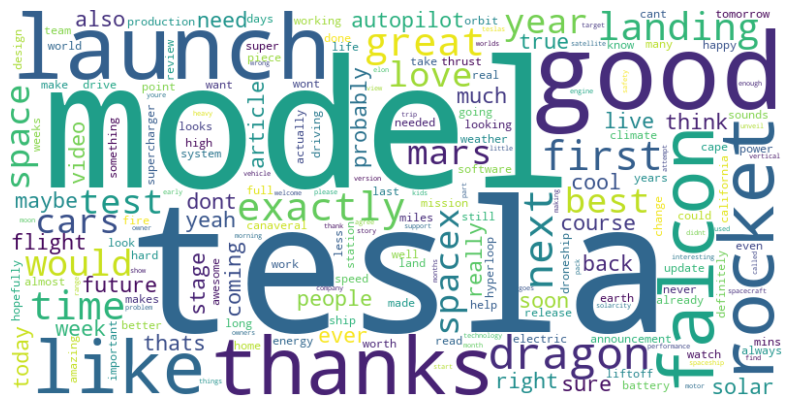

In [ ]:
# diccionario, donde las palabras son las claves y las frecuencias totales son los valores
word_frequencies = dict(zip(feature_names, np.array(doc_matrix.sum(axis=0)).reshape(-1)))

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Guardar la imagen en la carpeta:
wordcloud.to_file("image.png")

## Ejercicio 7

Surge una tendencia inconfundible con la prevalencia de términos asociados con los emprendimientos del propietario de X, Elon Musk, destacando sus empresas como Tesla y SpaceX. Palabras como 'Tesla,' 'launch,' 'rocket,' 'cars,' 'solar,' 'landing,' 'space,' 'Mars,' 'energy,' 'flight,' 'autopilot,' 'Hyperloop,' 'future,' 'Falcon,' 'drive,' 'Cape Canaveral,' 'test,' 'battery,' y 'spaceship' destacan de manera prominente, representando aspectos clave de sus iniciativas empresariales. Muchos de estos términos también reflejan áreas populares de interés público, lo que refuerza aún más su relevancia.

## Ejercicio 8

En el último ejercicio, encontraremos los tweets más similares a partir de los datos de Twitter utilizando la similitud del coseno, una métrica que mide la similitud direccional entre dos vectores en un espacio multidimensional, basándose en el ángulo entre ellos. Es una forma eficiente y matemática de medir la similitud entre objetos en un espacio vectorial. El resultado es un valor entre -1 y 1, donde

    1: los vectores son idénticos (o extremadamente similares en dirección)

    0: No hay similitud (los tweets no comparten patrones comunes).

    -1: indica que los vectores son opuestos, es decir, los tweets expresan ideas completamente contrarias.

Considerando que una puntuación cercana a 1 indica una alta similitud, se imprimirán los 10 tweets más similares junto con sus respectivas puntuaciones de similitud. Esto puede ayudarnos a identificar tweets que comparten temas, sentimientos o discusiones en común.

Se ha hecho una adaptacion de la funcion de preprocesamiento y en este caso, no se han eliminado las stopwords para poder calcular similitudes más precisas en cuanto al contexto completo del tweet. En cambio, si estuviesemos más interesadas en los temas o las palabras clave de los tweets, entonces eliminar las stopwords seria una mejor opción.

In [ ]:
def create_corpus_from_database(file_path):
    tweets = []
    with open(file_path, 'r', encoding='utf-8') as file:
        tweet = ""
        for line in file:
            line = line.strip()
            # Verificar si la línea contiene 'b' seguido de una comilla (simple o doble)
            if line.startswith('b\'') or line.startswith('b"') or line.startswith('"b') or line.startswith('"b\''):
                if tweet:
                    tweets.append(tweet.strip())
                    tweet = ""
                tweet += line.lstrip('b\'"').rstrip('\'"')
            else:
                tweet += line
    return tweets

corpus2 = create_corpus_from_database('tweets.txt')

def preprocess_text_tweets(text):
    text = re.sub(r'\b\S*[\\/]\S*\b', '', text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-ZáéíóúüñçÁÉÍÓÚÜÑÇ\s]', '', text)
    text = ' '.join(text.split())

    return text

preprocessed_corpus = [preprocess_text_tweets(tweet) for tweet in corpus2]
preprocessed_corpus


['and so the robots spared humanity',
 'exactly tesla is absurdly overvalued if based on the past but thats',
 'et tu walt',
 'stormy weather in shortville',
 'coal is dying due to nat gas fracking its basically dead',
 'its just a helicopter in helicopters clothing',
 'it wont matter',
 'pretty good',
 'why did we waste so much time developing silly rockets damn you aliens so obtuse you have all this crazy tech but cant speak english',
 'technology breakthrough turns out chemtrails are actually a message from timetraveling aliens describing the secret of teleportation',
 'rt weve created the worlds first spamdetecting ai trained entirely in simulation and deployed on a physical robot',
 'rt this is extremely important from and reusable rockets bring us much closer to becoming a',
 'def pd with ludicrous although the rocket starts going a lot faster after that',
 'we can def bring it back like dragon just a question of how much weight we need to add',
 'working on it',
 'looks like it 

In [ ]:
# Vectorizar el corpus preprocesado
tfidf_vectorizer = TfidfVectorizer()
tweet_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)

# Calcular la similitud coseno entre los vectores de los tweets
cosine_similarities = cosine_similarity(tweet_matrix, tweet_matrix)

# Encontrar los tweets más similares
num_tweets = len(preprocessed_corpus)
most_similar_tweets = []
for i in range(num_tweets):
    for j in range(i+1, num_tweets):
        similarity_score = cosine_similarities[i][j]
        most_similar_tweets.append((i, j, similarity_score))

most_similar_tweets.sort(key=lambda x: x[2], reverse=True)

# Imprimir los 10 tweets más similares
top_n = 10

if most_similar_tweets:
    print(f"Top {top_n} Tweets Más Similares:")
    for i in range(min(top_n, len(most_similar_tweets))):
        tweet_idx1, tweet_idx2, similarity_score = most_similar_tweets[i]
        print(f"Puntaje de Similitud: {similarity_score}")
        print("Tweet 1:", preprocessed_corpus[tweet_idx1])
        print("Tweet 2:", preprocessed_corpus[tweet_idx2])
        print()
else:
    print("No se encontraron tweets similares.")



Top 10 Tweets Más Similares:
Puntaje de Similitud: 1.0000000000000002
Tweet 1: no problem
Tweet 2: no problem

Puntaje de Similitud: 1.0000000000000002
Tweet 1: no problem
Tweet 2: no problem

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: of course
Tweet 2: of course

Puntaje de Similitud: 1.0000000000000002
Tweet 1: coming soon
Tweet 2: coming soon



In [ ]:
# Filtrar los tweets con menos de 6 palabras
filtered_corpus = [tweet for tweet in preprocessed_corpus if len(tweet.split()) >= 6]

tfidf_vectorizer = TfidfVectorizer()
tweet_matrix = tfidf_vectorizer.fit_transform(filtered_corpus)

cosine_similarities = cosine_similarity(tweet_matrix, tweet_matrix)
num_tweets = len(filtered_corpus)
most_similar_tweets = []
for i in range(num_tweets):
    for j in range(i+1, num_tweets):
        similarity_score = cosine_similarities[i][j]
        most_similar_tweets.append((i, j, similarity_score))

most_similar_tweets.sort(key=lambda x: x[2], reverse=True)

# Imprimir los 10 tweets más similares con 6 o más palabras
top_n = 10

if most_similar_tweets:
    print(f"Top {top_n} Tweets Más Similares:")
    for i in range(min(top_n, len(most_similar_tweets))):
        tweet_idx1, tweet_idx2, similarity_score = most_similar_tweets[i]
        print(f"Puntaje de Similitud: {similarity_score}")
        print("Tweet 1:", filtered_corpus[tweet_idx1])
        print("Tweet 2:", filtered_corpus[tweet_idx2])
        print()
else:
    print("No se encontraron tweets similares.")



Top 10 Tweets Más Similares:
Puntaje de Similitud: 0.9752867410939182
Tweet 1: rt my tesla model s is the best car ive ever had
Tweet 2: rt my model s is the best car ive ever had

Puntaje de Similitud: 0.8723473965016407
Tweet 1: rt my tesla model s is the best car ive ever had
Tweet 2: rt my tesla roadster is the best car ive ever had

Puntaje de Similitud: 0.8521581706827431
Tweet 1: falcon on lz at cape canaveral
Tweet 2: falcon standing on lz at cape canaveral

Puntaje de Similitud: 0.8480330393059907
Tweet 1: rt my tesla roadster is the best car ive ever had
Tweet 2: rt my model s is the best car ive ever had

Puntaje de Similitud: 0.7873238006778396
Tweet 1: falcon delivered dragon to its target orbit all good on the rocket
Tweet 2: falcon rocket booster has delivered dragon to its target orbit

Puntaje de Similitud: 0.759269304848762
Tweet 1: that has been my goal from the beginning need the gigafactory for model
Tweet 2: yes that has been the goal from the beginning

Puntaje d

En este ejercicio hemos aplicado varias técnicas para analizar los tweets de Twitter. Primero, leemos y preprocesamos los datos para crear un corpus de documentos, lo que nos permite estructurarlos de manera adecuada para analizarlos. Usamos herramientas como la matriz de términos de documentos (DTM) para transformar los tweets en un formato que los algoritmos puedan manejar y analizar. Después, al identificar las palabras más relevantes utilizando técnicas como TF-IDF, comprendemos mejor los temas y tendencias principales en los tweets.

Al visualizar las frecuencias de las palabras con un wordcloud, obtenemos una representación gráfica fácil de entender que nos muestra cuáles son los términos más comunes y cómo se relacionan entre sí, ayudándonos a ver rápidamente de qué tratan los tweets sin tener que leer todos los textos.

Finalmente hemos encontrado los tweets más similares entre sí. Este análisis nos permite identificar qué tweets comparten temas o contextos similares, lo que tiene varias aplicaciones prácticas. Por ejemplo, en marketing, podemos identificar tweets relacionados con productos o campañas, ayudándonos a hacer un análisis más eficaz de lo que la gente está comentando...